#### Metode i primjena vjestacke inteligencije
#### Laboratorijska vjezba 5
#### Student: Masovic Haris
#### Index: 1689/17993

## 0. Dependencies

In [1]:
import sys

!{sys.executable} -m pip install matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


## 2. Dataset: Reuters

### 2.1 Ucitavanje dataset-a

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#### 2.1.1 Koliko novosti ima u `train_data`, a koliko u `test_data`?

In [3]:
print(*['Broj novosti u train_data', len(train_data)])
print(*['Broj novosti u test_data', len(test_data)])

Broj novosti u train_data 8982
Broj novosti u test_data 2246


#### 2.1.2 Izlistajte vrijednosti iz `train_data[0]`.

In [4]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


#### 2.1.3 Za prvih 15 sekvenci isprintati: a) broj elemenata u sekvenci, b) kojoj klasi pripada, c) maksimalan i d) minimalan indeks u sekvenci. U izvjestaju napisati kod koji ste koristili za ovaj zadatak, kao i rezultate. Primjer rezultata dat je u ispisu ispod. (Koristiti for petlju.)

In [5]:
import numpy as np

for i in range(0, 15):
    print('Broj elemenata u sekvenci train_data[{0}] je: ({1},), a klasa je: {2}'.format(i, len(train_data[i]), train_labels[i]))
    print(*['Najveci index u sekvenci je:', np.max(train_data[i])])
    print(*['Najmanji index u sekvenci je:', np.min(train_data[i])])

Broj elemenata u sekvenci train_data[0] je: (87,), a klasa je: 3
Najveci index u sekvenci je: 4579
Najmanji index u sekvenci je: 1
Broj elemenata u sekvenci train_data[1] je: (56,), a klasa je: 4
Najveci index u sekvenci je: 7511
Najmanji index u sekvenci je: 1
Broj elemenata u sekvenci train_data[2] je: (139,), a klasa je: 3
Najveci index u sekvenci je: 4514
Najmanji index u sekvenci je: 1
Broj elemenata u sekvenci train_data[3] je: (224,), a klasa je: 4
Najveci index u sekvenci je: 9691
Najmanji index u sekvenci je: 1
Broj elemenata u sekvenci train_data[4] je: (101,), a klasa je: 4
Najveci index u sekvenci je: 8295
Najmanji index u sekvenci je: 1
Broj elemenata u sekvenci train_data[5] je: (116,), a klasa je: 4
Najveci index u sekvenci je: 3234
Najmanji index u sekvenci je: 1
Broj elemenata u sekvenci train_data[6] je: (100,), a klasa je: 4
Najveci index u sekvenci je: 9474
Najmanji index u sekvenci je: 1
Broj elemenata u sekvenci train_data[7] je: (100,), a klasa je: 3
Najveci inde

#### 2.1.4 Koji opseg vrijednosti se nalazi u `train_labels` (min, max), a koji u `test_labels`?

In [6]:
import numpy as np

print('Opseg vrijednosti za trazene labele:')
print('')
print(*['train_labels opseg (min,max):', '({0},{1})'.format(np.min(train_labels), np.max(train_labels))])
print(*['test_labels opseg (min,max):', '({0},{1})'.format(np.min(test_labels), np.max(test_labels))])

Opseg vrijednosti za trazene labele:

train_labels opseg (min,max): (0,45)
test_labels opseg (min,max): (0,45)


#### 2.1.5 Koja sekvenca ima najveci indeks u datom dataset-u? To ne mora biti broj vezan za num words. Korisiti numpy paket (import numpy as np).

In [7]:
import numpy as np 

print(*['Najveci index unutar liste lista:', np.max(np.max(train_data))])

Najveci index unutar liste lista: 9975


#### 2.1.6 Na stanici `https://keras.io/datasets/` mozete naci sve parametre koje mozete korisiti u pozivu funkcije `load_data()`. Objasnite svaki od parametara (9).

- `path` - putanja gdje ce se kesirati podaci (u odnosu na relativnu putanju `~/.keras/dataset`).
- `num_words` - predstavlja broj najcesce koristenih rijeci koje ce biti uzete u razmatranje, a ako se ne posalje broj, defaultna vrijednost je da uzme sve rijeci.
- `skip_top` - parametar koji govori koliko top N najvise frekventnih rijeci da se preskoci u uzimanju, default je nula.
- `maxlen` - predstavlja maximalnu duzinu sekvence koja da se koristi, ako sekvenca postoji bice skracena, ukoliko se ne posalje nista, nema skracivanja.
- `test_split` - decimalni broj izmedju 0 i 1 koji govori kolika frakcija da se uzme za testne podatke, po defaultu je 20-80 ratio tj. 20% da se uzimaju kao testni podaci.
- `seed` - parametar koji se koristi za mijesanje ponavljajucih podataka.
- `start_char` - parametar koji odredjuje karakter kojim je definisan pocetak sekvence.
- `oov_char` - parametar kojim odredjuje karakter kojim ce biti zamijenjene rijeci koje su izbacene na osnovu `num_words` ili `skip_top` opcija.
- `index_from` - parametar koji odredjuje rijeci kojecće se ideksirati, tj. rijeci vece ili jednake indeksu `index_from` ce biti indeksirane.

### 2.2 Rjecnik Reuters dataset-a

In [8]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### 2.2.1 Za prvih 15 sekvenci u `train_data` dekodirati novosti i odrediti kojoj kategoriji pripadaju.

In [9]:
def return_formatted_review(string, width=100):
    if len(string) > width:
        string = string[:width-3] + '...'
    return "{0:<{1}s}".format(string, width)

for i in range(0, 15):
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])
    print(*['Novost', i, 'je u kategoriji:', train_labels[i]])
    print(return_formatted_review(decoded_review))

Novost 0 je u kategoriji: 3
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1...
Novost 1 je u kategoriji: 4
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct sta...
Novost 2 je u kategoriji: 3
? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0...
Novost 3 je u kategoriji: 4
? the farmers home administration the u s agriculture department's farm lending arm could lose ab...
Novost 4 je u kategoriji: 4
? seton co said its board has received a proposal from chairman and chief executive officer phili...
Novost 5 je u kategoriji: 4
? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 ...
Novost 6 je u kategoriji: 4
? lt qintex america ltd said it is again extending its offer of 13 dlrs a share for 3 3 mln princ...
Novost 7 je u kategoriji: 3
? shr 49 cts vs 39 cts net 886 937 vs 892 323 revs 25 9 mln vs 23 7 m

#### 2.2.2 Za 10 nasumicnih (random) novosti iz citavog dataset-a izvrsiti dekodiranje, te ih isprintati na ekran, po uzoru na kod dat ispod, zajedno sa informacijom o grupi kojoj pripadaju. U ispisu su koristene "..." radi zauzimanja manjeg prostora. Koristiti naredbu randint(0, nekibroj), pri cemu je nekibroj maksimalan broj sekvenci u skupu `train_data`.

In [10]:
import numpy as np

random_numbers = np.random.randint(0, len(train_data), size = 10)

# u slucaju da ne zelite skracenu varijantu stringa, samo ispisati `decoded_review`

for i in range(0, len(random_numbers)):
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]])
    print('Novost ID {0} je definisana kao: \"{1}\". Rijec je o novosti iz grupe {2}.'
          .format(random_numbers[i], return_formatted_review(decoded_review, 40), train_labels[random_numbers[i]]))


Novost ID 4132 je definisana kao: "? ? ? said as a result of its decembe...". Rijec je o novosti iz grupe 19.
Novost ID 8728 je definisana kao: "? generale de banque sa lt ? br and l...". Rijec je o novosti iz grupe 40.
Novost ID 1381 je definisana kao: "? shr 3 28 dlrs vs 22 cts shr diluted...". Rijec je o novosti iz grupe 38.
Novost ID 7207 je definisana kao: "? the farmers home administration the...". Rijec je o novosti iz grupe 3.
Novost ID 8322 je definisana kao: "? seton co said its board has receive...". Rijec je o novosti iz grupe 4.
Novost ID 2652 je definisana kao: "? the u s agriculture department esti...". Rijec je o novosti iz grupe 3.
Novost ID 1643 je definisana kao: "? lt qintex america ltd said it is ag...". Rijec je o novosti iz grupe 19.
Novost ID 3815 je definisana kao: "? shr 49 cts vs 39 cts net 886 937 vs...". Rijec je o novosti iz grupe 3.
Novost ID 5001 je definisana kao: "? oper shr 23 cts vs 77 cts oper net ...". Rijec je o novosti iz grupe 3.
Novost ID 4975 

### 2.3 Organizacija podataka

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

#### 2.3.1 Detaljno objasnite kako navedeni kodovi rade i da li postoje razlike medu njima.

- Funkcija `vectorize_sequences` definise sekvencu od `dimension` broja elemenata, koji imaju vrijednost ili `1.` ili `0.`. Ukoliko je vrijednost `1.` onda se indeks nalazi u odredjenoj sekveni koja je proslijedjena kroz prvi parametar, u protivnom se ne nalazi.
- Prvo se u varijablu `results` definisu sve nule kroz uredjeni par `(len(sequences), dimension)`, onda prolaskom kroz sve sekvence, dodijeljuje se za svaku sekvencu enumeracija i postavlja se vrijednost na `1.`. Na kraju se vraca matrica `results`.
- Kada je u pitanju funkcija `to_one_hot` mozemo primijeniti isti opis i za nju, samo umjesto `sequences` koristimo varijablu `labels`.
- Razlike izmedju ove 2 funkcije nema osim defaultnog `dimension` parametra.

#### 2.3.2 Primijenite funkciju `vectorize_sequences()` na podatke iz skupa za treniranje i testiranje. Rezultate funkcije snimite u varijable `x_train` i `x_test`. Ovdje je dovoljno napisati koristeni kod.

In [12]:
data_size = 10000

x_train = vectorize_sequences(train_data, data_size)
x_test = vectorize_sequences(test_data, data_size)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2.3.3 Utvrdite koja vrsta elemenata je snimljena u `x_train`, a koja u `y_train` (vektor, skalar, int, float i td). Napisite naredbe koje ste koristili.

- Koristene naredbe su naredba `type` i naredna `.dtype`.
- Vidimo, na osnovu koda ispod, da su i `x_train` i `y_train` tipa numpy array `numpy.ndarray`, a elementi unutar array-a su `float64` u slucaju `x_train`, odnosno `float32` u slucaju `float32`.

In [13]:
print(*['x_train', type(x_train), 'tip elemenata', x_train.dtype])
print(*['y_train', type(y_train), 'tip elemenata', y_train.dtype])

x_train <class 'numpy.ndarray'> tip elemenata float64
y_train <class 'numpy.ndarray'> tip elemenata float32


#### 2.3.4 Za prvih 15 sekvenci isprintati: a) broj elemenata u sekvenci, b) vrijednosti elemenata (skraceni broj elemenata je dovoljan).

In [14]:
for i in range(0, 15):
    print(*['Za x_train[{0}], broj elemenata u sekvenci je:'.format(i), len(x_train[i])])
    print(*['Elementi u ovoj sekvenci:', x_train[i]])
    
print(*['y_train, broj elemenata:', len(y_train), 'elementi:', y_train])

Za x_train[0], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 1. ... 0. 0. 0.]
Za x_train[1], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 1. ... 0. 0. 0.]
Za x_train[2], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 1. ... 0. 0. 0.]
Za x_train[3], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 1. ... 0. 0. 0.]
Za x_train[4], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 1. ... 0. 0. 0.]
Za x_train[5], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 0. ... 0. 0. 0.]
Za x_train[6], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 0. ... 0. 0. 0.]
Za x_train[7], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 1. ... 0. 0. 0.]
Za x_train[8], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 1. ... 0. 0. 0.]
Za x_train[9], broj elemenata u sekvenci je: 10000
Elementi u ovoj sekvenci: [0. 1. 1. ... 

#### 2.3.5 Primijenite funkciju `to_one_hot()` na podatke iz labela za treniranje i testiranje. Rezultate funkcije snimite u varijable `one_hot_train_labels` i `one_hot_test_labels`.

In [15]:
dimension_size = 46

one_hot_train_labels = to_one_hot(train_labels, dimension_size)
one_hot_test_labels = to_one_hot(test_labels, dimension_size)

#### 2.3.6 Za 15 nasumicnih (random) sekvenci isprintati: a) staru labelu, b) zatim provjeriti da li je na tom indeksu zapisana ‘1’, kao i to da li je u dva okolna elementa u vektora napisana ‘0’.

In [16]:
import numpy as np

def random_15_elements(new_labels, old_labels): 
    random_numbers = np.random.randint(0, len(train_data), size = 15)

    for i in range(0, len(random_numbers)):
        index = random_numbers[i]
        class_value = int(old_labels[index])
        
        array_for_index = new_labels[index]
        binary_value = array_for_index[class_value]
        
        print(*['Za novost id:', index, 'stara labela je:', old_labels[index]])
        print(*['Nova labela je:', binary_value, 'i ona je jednaka 1. za novost id:', binary_value == 1.])

        length = len(array_for_index)    
        
        if class_value != 0:
            index_before = array_for_index[class_value - 1]
            print('Element prije je jednak 0.:', index_before == 0.)
        if class_value != length - 1:
            index_after = array_for_index[class_value + 1]
            print('Element poslije je jednak 0.:', index_after == 0.)

        print('')

random_15_elements(one_hot_train_labels, y_train)

Za novost id: 3040 stara labela je: 3.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 3531 stara labela je: 4.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 5367 stara labela je: 3.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 3959 stara labela je: 3.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 1654 stara labela je: 29.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 7344 stara labela je: 29.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 

#### 2.3.7 Zamijeniti funkciju to one hot sa funkcijom `to_categorical` u uraditi opet prethodni zadatak.

In [17]:
from keras.utils import to_categorical

to_categorical_train_labels = to_categorical(train_labels)
to_categorical_test_labels = to_categorical(test_labels)

random_15_elements(to_categorical_train_labels, y_train)

y_train = to_categorical_train_labels
y_test = to_categorical_test_labels

Za novost id: 287 stara labela je: 4.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 744 stara labela je: 16.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 7708 stara labela je: 4.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 7342 stara labela je: 1.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 358 stara labela je: 3.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: True

Za novost id: 1299 stara labela je: 4.0
Nova labela je: 1.0 i ona je jednaka 1. za novost id: True
Element prije je jednak 0.: True
Element poslije je jednak 0.: 

## 3. Definisanje neuronske mreze

### 3.1 Podesavanje slojeva

#### 3.1.1 Ako ulazni vektor ima 10,000 elemenata, i takvih vektora ima 200, a sloj ima 64 izlaza, koja je dimenzija matrice W1? Koristiti se informacijama sa predavanja.

- Dimenzija matrice W druge ce biti `10000x64` odnosno `640k`.

### 3.2 Arhitektura mreze

#### 3.2.1 Napisati kod za definisanje arhitekture mreze.

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### 3.2.2 Napisati kod za definisanje optimizatora, funkcije gubitka i mjere tacnosti.

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### 3.2.3 Objasnite kako radi `categorical_crossentropy` i zasto se koristi za ovaj primjer. (Koristi Keras dokumentaciju za pronalazenje odgovora na ovo pitanje ili preporucenu knjigu.)

`categorical_crossentropy` racuna funkciju gubitka na sljedeci nacin:

\begin{equation*}
Gubitak = \sum_{i=1}^k{y_i * log(y_i)}
\end{equation*}

- `y` predstavlja niz skalara, dok `k` predstavlja koliko izlaza imamo za nas problem.
- Ovakav nacin racunanja gubitka omogucava dobru mjeru koliko su dvije diskretne distribucije vjerovatnoce razlicite za dva elementa, sto znaci da u slucaju da specifican `i` unutar `y` niza je jednak 1, to znaci da samo taj skalar unutar niza se "desava" odnosno ima najvecu vrijednost.
- U nasem primjeru ovo je veoma pogodno jer imamo `46` klasifikacija, pri cemu nam je na izlazu potreban samo jedan tip od tih `46`.

#### 3.2.4 Objasnite zasto koristimo softmax. Objasnite dimenzionalnost izlaznog nivoa.

- Posto je u pitanju `multiclass` problem, tj. 1 entry moze imati `46` varijanti izlaza, da bi se na odredjeni nacin znalo koji ulaz pripada kojem izlazu, to se moze rijesiti vjerovatnocom. Softmax daje na svom izlazu vjerovatnoce da odredjeni entry pripada odredjenim klasama, a suma mora biti jednaka `1`. Zbog ovog se koristi softmax. 
- Dimenzionalnost izlaznog nivoa je `46`, jer imamo toliko klasifikacija.

### 3.3 Validacija modela

#### 3.3.1 Koje naredbe cete koristiti za izdvajanje 1,000 uzoraka iz originalnog skupa za treniranje?

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

#### 3.3.2 Koje naredbe cete koristiti za kodiranje labela za novonastale podatke?

In [21]:
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### 3.4 Treniranje modela

In [22]:
reuters_model = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 21ms/step - loss: 2.5004 - accuracy: 0.5242 - val_loss: 1.6585 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.3672 - accuracy: 0.7031 - val_loss: 1.2653 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0170 - accuracy: 0.7823 - val_loss: 1.1079 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8077 - accuracy: 0.8252 - val_loss: 1.0187 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6490 - accuracy: 0.8601 - val_loss: 0.9463 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5213 - accuracy: 0.8896 - val_loss: 0.9187 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4222 - accuracy: 0.9123 - val_loss: 0.9119 - val_accuracy: 0.8190
Epoch 8/20
16

#### 3.4.1 Nacrtajte grafikone na kojima ce biti prikazani podaci o gubitku kod treniranja i validacije u odnosu na broj epoha.

Dict keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


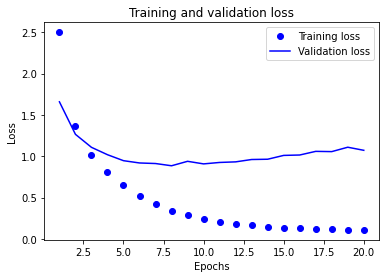

In [23]:
import matplotlib.pyplot as plt

history_dict = reuters_model.history
print(*['Dict keys:', history_dict.keys()])

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 3.4.2 Nacrtajte grafikone na kojima ce biti prikazani podaci o tacnosti kod treniranja i validacije u odnosu na broj epoha.

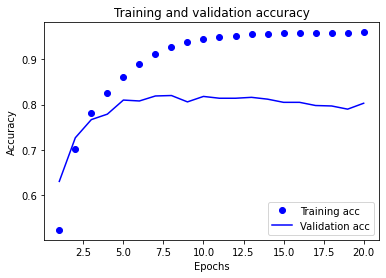

In [24]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 3.4.3 Nakon koje epohe model ulazi u overfitting?

- Nakon 7 epohe model ulazi u overfitting.

#### 3.4.4 Ponovo pokrenuti treniranje mreze u odnosu na prethodni odgovor i ponovo izvrsiti mjerenje.

In [25]:
reuters_model_7_epoch = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/7
16/16 [==============================] - 0s 18ms/step - loss: 0.1074 - accuracy: 0.9569 - val_loss: 1.1100 - val_accuracy: 0.7910
Epoch 2/7
16/16 [==============================] - 0s 13ms/step - loss: 0.1094 - accuracy: 0.9568 - val_loss: 1.1262 - val_accuracy: 0.8060
Epoch 3/7
16/16 [==============================] - 0s 14ms/step - loss: 0.1034 - accuracy: 0.9593 - val_loss: 1.1246 - val_accuracy: 0.8060
Epoch 4/7
16/16 [==============================] - 0s 14ms/step - loss: 0.1045 - accuracy: 0.9563 - val_loss: 1.0957 - val_accuracy: 0.7950
Epoch 5/7
16/16 [==============================] - 0s 14ms/step - loss: 0.1016 - accuracy: 0.9582 - val_loss: 1.1344 - val_accuracy: 0.8010
Epoch 6/7
16/16 [==============================] - 0s 13ms/step - loss: 0.0991 - accuracy: 0.9597 - val_loss: 1.1639 - val_accuracy: 0.7980
Epoch 7/7
16/16 [==============================] - 0s 12ms/step - loss: 0.1007 - accuracy: 0.9584 - val_loss: 1.1942 - val_accuracy: 0.7990


#### 3.4.5 Zatim izvrsiti mjerenja na testnom skupu koristeci funkciju `model.evaluate()`. Objasnite razliku izmedu funkcije `model.evaluate()` i `model.predict()`.

- Razlika izmedju `model.evaluate` i `model.predict` je sto `model.evaluate` testira vrijednosti i racuna funkciju gubitka za sve klase koje su trazene, i vraca listu gubitaka i metrika u jednoj vrijendosti. `model.predict` samo predvidja odnosno testira izlaz modela u zavisnosti od ulaznih podataka. Izlazne vrijednosti ove dvije funkcije su razlicite jer ne racunaju iste stvari.


In [26]:
val_loss, val_acc = model.evaluate(x_val, y_val)

print(*['Validacija - tacnost: ', val_acc, 'a gubitak:', val_loss])

32/32 [==============================] - 0s 1ms/step - loss: 1.1942 - accuracy: 0.7990
Validacija - tacnost:  0.7990000247955322 a gubitak: 1.1941951513290405


#### 3.4.6 Ponovo izmjeriti tacnost i funkciju gubitka i uporediti sa prethodnim mjerenjima.

- Poredeci sa prethodnim graficima, vidimo da najbolju tacnost i najmanji gubitak ostvarujemo pri kraju `7` epohe.

Dict keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


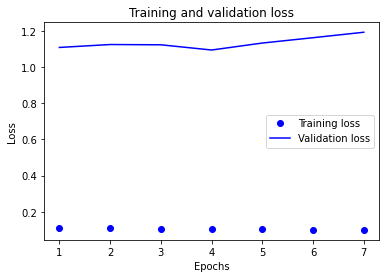

In [27]:
import matplotlib.pyplot as plt

history_dict = reuters_model_7_epoch.history
print(*['Dict keys:', history_dict.keys()])

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

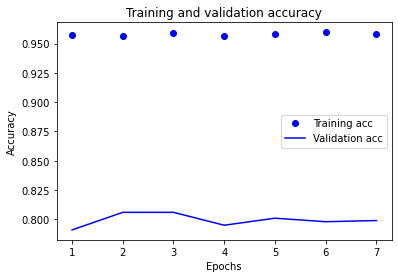

In [28]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 3.5 Testiranje modela na testnim podacima

In [29]:
predictions = model.predict(x_test)

#### 3.5.1 Koja je dimenzionalnost jedne predikcije (bilo koje)?

- Dimenzionalnost je 46.

#### 3.5.2 Koja je suma vrijednosti iz jedne predikcije (bilo koje)? Da li je to slucaj i sa ostalim predikcijama? Zasto je to tako?

- Suma vrijednosti bilo koje predikcije je 1.
- To je slucaj sa svim predikcijama.
- Zato sto softmax na svom izlazu za svaku klasu daje 46 vrijednosti koje sumarno predstavljaju jedinicu, ali za svaku predstavljaju pripadnost te predikcije za tu klasu.

#### 3.5.3 Za prvih 10 predikcija iz skupa `x_test` naci indeks sa najvecoj vjerovatnocom (korisiti numpy i argmax). Da li je to u skladu sa dostupnim oznakama (labelama)?

In [30]:
import numpy as np

prvih_deset = predictions[:10]

for i, item in enumerate(prvih_deset):
    max_index = np.argmax(item)

    predicted_label = np.argmax(predictions[max_index])

    real_label = np.argmax(y_test[max_index])

    decoded_max = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[max_index]])

    print(*['Novost ID:', i, 'stvarna labela:', real_label, 'predicted labela:', predicted_label])
    print(return_formatted_review(decoded_max, 100))
    print('')

Novost ID: 0 stvarna labela: 4 predicted labela: 4
? ? ? oil and gas partnership said it completed the sale of interests in two major oil and gas fi...

Novost ID: 1 stvarna labela: 5 predicted labela: 1
? grain traders said they were still awaiting results of yesterday's u k intervention feed wheat ...

Novost ID: 2 stvarna labela: 10 predicted labela: 10
? philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonn...

Novost ID: 3 stvarna labela: 4 predicted labela: 13
? strong south ? winds were keeping many vessels trapped in the ice off the finnish and swedish c...

Novost ID: 4 stvarna labela: 3 predicted labela: 3
? period ended january 31 shr 22 cts vs 16 cts net 518 564 vs 374 198 revs 2 090 724 vs 1 614 079...

Novost ID: 5 stvarna labela: 4 predicted labela: 4
? ? ? oil and gas partnership said it completed the sale of interests in two major oil and gas fi...

Novost ID: 6 stvarna labela: 4 predicted labela: 4
? ? ? oil and gas partnershi

#### 3.5.4 Koliko novosti ima maksimalnu vjerovatnocu vecu od 0.5?

In [31]:
import numpy as np

print(*['Broj novosti sa vjerovatnocom vecom od 0.5:', np.count_nonzero(predictions > 0.5)])

Broj novosti sa vjerovatnocom vecom od 0.5: 2129


#### 3.5.5 Koja je tacnost nad testnim skupom podataka, a koliki je gubitak?

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(*['Test - tacnost: ', test_acc, 'a gubitak:', test_loss])

71/71 [==============================] - 0s 1ms/step - loss: 1.4103 - accuracy: 0.7774
Test - tacnost:  0.7773820161819458 a gubitak: 1.4103102684020996


## 4. Dalja eksperimentiranja

In [33]:
print(*['Validacija - tacnost: ', val_acc, 'a gubitak:', val_loss])
print(*['Test - tacnost: ', test_acc, 'a gubitak:', test_loss])

Validacija - tacnost:  0.7990000247955322 a gubitak: 1.1941951513290405
Test - tacnost:  0.7773820161819458 a gubitak: 1.4103102684020996


#### 4.0.1 Modifikovati postojeci model mreze na nacin da u drugom sloju koristite 4 skrivene procesne jedinice. Koja je tacnost ovog modela i gubitak? Uporedite sa originalnim modelom.

- Poredeci sa orginalnim modelom, tacnost je smanjena, a gubitak povecan bilo validacijski dataset ili testni dataset. Kod je dat ispod.

In [34]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

reuters_model = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))

val_loss, val_acc = model.evaluate(x_val, y_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('')
print(*['Validacija - tacnost: ', val_acc, 'a gubitak:', val_loss])
print(*['Test - tacnost: ', test_acc, 'a gubitak:', test_loss])

Epoch 1/7
16/16 [==============================] - 0s 18ms/step - loss: 3.5415 - accuracy: 0.0108 - val_loss: 3.2798 - val_accuracy: 0.0340
Epoch 2/7
16/16 [==============================] - 0s 12ms/step - loss: 3.0889 - accuracy: 0.1378 - val_loss: 2.9517 - val_accuracy: 0.2360
Epoch 3/7
16/16 [==============================] - 0s 13ms/step - loss: 2.7241 - accuracy: 0.2539 - val_loss: 2.6457 - val_accuracy: 0.2530
Epoch 4/7
16/16 [==============================] - 0s 12ms/step - loss: 2.3754 - accuracy: 0.3017 - val_loss: 2.3380 - val_accuracy: 0.3710
Epoch 5/7
16/16 [==============================] - 0s 12ms/step - loss: 2.0140 - accuracy: 0.5583 - val_loss: 2.0045 - val_accuracy: 0.6140
Epoch 6/7
16/16 [==============================] - 0s 13ms/step - loss: 1.6846 - accuracy: 0.6366 - val_loss: 1.7646 - val_accuracy: 0.6260
Epoch 7/7
71/71 [==============================] - 0s 1ms/step - loss: 1.7306 - accuracy: 0.6126

Validacija - tacnost:  0.625 a gubitak: 1.6478742361068726
Tes

#### 4.0.2 U modelu ste koristili dva skrivena sloja. Pokusajte koristiti jedan ili tri skrivena sloja i utvrdite kako to utice na tacnost kod validacijskog i testnog skupa.

- Koristena su tri skrivena sloja, tacnost je povecana, a gubitak je smanjen i za validacijski i za testni dataset. Kod je dat ispod.

In [35]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

reuters_model = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))

val_loss, val_acc = model.evaluate(x_val, y_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('')
print(*['Validacija - tacnost: ', val_acc, 'a gubitak:', val_loss])
print(*['Test - tacnost: ', test_acc, 'a gubitak:', test_loss])

Epoch 1/7
16/16 [==============================] - 0s 20ms/step - loss: 2.9524 - accuracy: 0.4682 - val_loss: 1.8849 - val_accuracy: 0.6440
Epoch 2/7
16/16 [==============================] - 0s 13ms/step - loss: 1.5172 - accuracy: 0.6991 - val_loss: 1.3223 - val_accuracy: 0.7050
Epoch 3/7
16/16 [==============================] - 0s 14ms/step - loss: 1.1112 - accuracy: 0.7580 - val_loss: 1.1971 - val_accuracy: 0.7230
Epoch 4/7
16/16 [==============================] - 0s 13ms/step - loss: 0.8983 - accuracy: 0.7978 - val_loss: 1.0909 - val_accuracy: 0.7600
Epoch 5/7
16/16 [==============================] - 0s 13ms/step - loss: 0.7279 - accuracy: 0.8428 - val_loss: 1.0775 - val_accuracy: 0.7760
Epoch 6/7
16/16 [==============================] - 0s 13ms/step - loss: 0.5882 - accuracy: 0.8728 - val_loss: 1.0012 - val_accuracy: 0.7850
Epoch 7/7
71/71 [==============================] - 0s 947us/step - loss: 1.0362 - accuracy: 0.7823

Validacija - tacnost:  0.8069999814033508 a gubitak: 0.95766

#### 4.0.3 Pokusajte koristiti slojeve s vise skrivenih jedinica ili manje skrivenih jedinica, na primjer 32, 128 i 256 jedinice. Utvrdite kako to utice na tacnost kod validacijskog i testnog skupa.

- Povecan je broj skrivenih jedinica u drugom sloju, tacnost je povecana, a gubitak je smanjen i za validacijski i za testni dataset. Kod je dat ispod.

In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

reuters_model = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))

val_loss, val_acc = model.evaluate(x_val, y_val)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('')
print(*['Validacija - tacnost: ', val_acc, 'a gubitak:', val_loss])
print(*['Test - tacnost: ', test_acc, 'a gubitak:', test_loss])

Epoch 1/7
16/16 [==============================] - 0s 20ms/step - loss: 2.5494 - accuracy: 0.5338 - val_loss: 1.6205 - val_accuracy: 0.6540
Epoch 2/7
16/16 [==============================] - 0s 13ms/step - loss: 1.3271 - accuracy: 0.7234 - val_loss: 1.2280 - val_accuracy: 0.7480
Epoch 3/7
16/16 [==============================] - 0s 13ms/step - loss: 0.9671 - accuracy: 0.7959 - val_loss: 1.0989 - val_accuracy: 0.7780
Epoch 4/7
16/16 [==============================] - 0s 13ms/step - loss: 0.7457 - accuracy: 0.8404 - val_loss: 0.9677 - val_accuracy: 0.8000
Epoch 5/7
16/16 [==============================] - 0s 13ms/step - loss: 0.5782 - accuracy: 0.8776 - val_loss: 0.9301 - val_accuracy: 0.8090
Epoch 6/7
16/16 [==============================] - 0s 13ms/step - loss: 0.4532 - accuracy: 0.9028 - val_loss: 0.9095 - val_accuracy: 0.8090
Epoch 7/7
71/71 [==============================] - 0s 1ms/step - loss: 1.0054 - accuracy: 0.7792

Validacija - tacnost:  0.800000011920929 a gubitak: 0.94282674